In [1]:
import nltk

In [2]:
import pandas as pd

In [3]:
# The error message ParserError, indicates that there is a mismatch in the number of columns expected and the number of columns
#found in my CSV file. In this case, it expected 4 fields in line 19673 but found 5.
#This type of error probably occurs when there are commas within a field that aren't enclosed in double quotes, causing the parser 
#to incorrectly interpret them as field separators. The other cleaned dataset will be used going forward
#df_clean = pd.read_table('cleaned_ProjectTweets.csv', sep=',', error_bad_lines=False)

In [4]:
df_cleaner = pd.read_csv('cleanedt_ProjectTweets.csv', dtype={0: str}) #the header was changed to string type

df_cleaner.head(5)

userid                      timestamp       username  \
0  1467812025  2009-04-07T06:20:09.000+01:00        mimismo   
1  1468032862  2009-04-07T07:21:35.000+01:00   lamarmcarter   
2  1468043104  2009-04-07T07:24:53.000+01:00   Geoffasaurus   
3  1468078493  2009-04-07T07:35:44.000+01:00    kennyduduxd   
4  1468242583  2009-04-07T08:30:07.000+01:00  Tsukihysteria   

                                               tweet  
0                                       que me muera  
1  happy for coach stringer hof co now if i can o...  
2  keeeerrrrriiiiii i really have nothing better ...  
3                cant sleep dam naps lol and its hot  
4  thank you for being a great character on house...

In [5]:
df=df_cleaner
df.head(5)

userid                      timestamp       username  \
0  1467812025  2009-04-07T06:20:09.000+01:00        mimismo   
1  1468032862  2009-04-07T07:21:35.000+01:00   lamarmcarter   
2  1468043104  2009-04-07T07:24:53.000+01:00   Geoffasaurus   
3  1468078493  2009-04-07T07:35:44.000+01:00    kennyduduxd   
4  1468242583  2009-04-07T08:30:07.000+01:00  Tsukihysteria   

                                               tweet  
0                                       que me muera  
1  happy for coach stringer hof co now if i can o...  
2  keeeerrrrriiiiii i really have nothing better ...  
3                cant sleep dam naps lol and its hot  
4  thank you for being a great character on house...

In [6]:
# Check for any NaN values in the 'tweets' column
nan_values = df['tweet'].isna()
print("Number of NaN values in 'tweets':", nan_values.sum())

Number of NaN values in 'tweets': 3707


In [7]:
import pandas as pd
import nltk
from nltk.collocations import TrigramCollocationFinder
from nltk.tokenize import word_tokenize
from collections import Counter  
from nltk.probability import FreqDist 
from nltk.text import Text

nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')  
nltk.download('vader_lexicon') 
nltk.download('punkt') 

# NLTK operations
stopwords = nltk.corpus.stopwords.words("english")

# Getting all tweets separated by a space
all_tweets = df['tweet'].str.cat(sep=' ')

# Tokenize
tkwords = word_tokenize(all_tweets)

# Remove stopwords and non-alphabetic tokens
filtered_words = [word for word in tkwords if word.isalpha() and word.lower() not in stopwords]

# Get the frequency distribution
fd = FreqDist(filtered_words)  

# Print the 10 most common words
print("Top 10 Most Common Words in Frequency Distribution:")
for word, frequency in fd.most_common(10):
    print(f"{word}: {frequency}")
#The above code concatenates all the tweets into a single string, tokenizes the string into words, 
#filters out stopwords and non-alphabetic tokens, and then calculates and prints the 10 most common words.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\swast\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\swast\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\swast\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\swast\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top 10 Most Common Words in Frequency Distribution:
im: 177631
good: 88220
day: 83371
get: 79737
like: 77263
go: 72704
got: 69342
dont: 67003
today: 64367
going: 63907


In [8]:
# Create an NLTK Text object from filtered words
text_obj = Text(filtered_words)

# Specific word to find concordances with
specific_word = 'good'  
print(f"\nConcordances for word '{specific_word}':")
text_obj.concordance(specific_word, lines=5)  


Concordances for word 'good':
Displaying 5 of 88220 matches:
 time moment coach forced retirement good years ago due injury coach us havent
ndstill today sorry bout car btw kat good vacation personally st year new jobz
d ownmust life shite studying finals good ol stock valuation options amp futur
 grocery shopping lead exciting life good thing riding bike keeps blowing head
igting twit curse twitter curse oooh good im fine thanks baking cricket lookin


In [9]:
specific_word = 'happy'  
print(f"\nConcordances for word '{specific_word}':")
text_obj.concordance(specific_word, lines=5)  


Concordances for word 'happy':
Displaying 5 of 26216 matches:
que muera happy coach stringer hof co finish term pa
ooooo twitter news weathers fab work happy raining going lena day sucks trying 
o hate public transportation raining happy monday alright got cold think feelin
 khong xoaquot sign week argh boo oh happy days australiain recsion thought alr
ood snake house futsal week feel fat happy mothers day beautiful woman especial


In [10]:
specific_word = 'great'  
print(f"\nConcordances for word '{specific_word}':")
text_obj.concordance(specific_word, lines=5)  


Concordances for word 'great':
Displaying 5 of 32712 matches:
ot cant sleep dam naps lol hot thank great character house im sad see go wan na
time realise talk cruise summer tour great making us fans europe sad xx holy sh
ly going outside dont want dont feel great hate go away keep missing first part
 holy crap im making progress sounds great wish could go take photos web sites 
 show drop text saying hes part crew great birds moms place sounds like inside 


In [11]:
specific_word = 'wonderful'  
print(f"\nConcordances for word '{specific_word}':")
text_obj.concordance(specific_word, lines=5)  


Concordances for word 'wonderful':
Displaying 5 of 3808 matches:
tart goin back forreall lol sounds wonderful envy havent camped years think gla
ill haent prebooked ooh sun always wonderful cloudy storms bowling green kentuc
 stupid lady cut bangs short grrrr wonderful asked sad pics etc see something s
npacking weather dancing edinburgh wonderful morning happy mothers daymy mommy 
er shame guys would loved see sign wonderful wekend stockholm unfortenately cam


In [12]:
# This is just a test for my own knowledge 
specific_word = 'stocks'  
print(f"\nConcordances for word '{specific_word}':")
text_obj.concordance(specific_word, lines=5)  


Concordances for word 'stocks':
Displaying 5 of 44 matches:
 years think passing global fishing stocks fully exploited amp fish farms pose
s saturday guess every body selling stocks results jessi likey fob sorry files
tting sick cant believe forever ran stocks headband ugh dying one cant seem ge
ing database ltltlt tried learn day stocks trading friday slownot best day tak
iran nope saving burnout looks like stocks ran fifa would good bought weeks ba


In [13]:
specific_word = 'bad'  
print(f"\nConcordances for word '{specific_word}':")
text_obj.concordance(specific_word, lines=5)  


Concordances for word 'bad':
Displaying 5 of 26657 matches:
abrinas im bored work haha already im bad student facebook tard cant get hold c
 hours think im gettin cold day going bad worsei broke shoe morning windy freez
eadache wore cuddle shirt got cuddles bad im sick cant enjoy killers like wan n
ize fixe bro u stop followin traffics bad guess prayers impossible answer chang
feeling well cancel tuition noor felt bad sighs need buck things literally yes 


In [14]:
specific_word = 'upset'  
print(f"\nConcordances for word '{specific_word}':")
text_obj.concordance(specific_word, lines=5)  


Concordances for word 'upset':
Displaying 5 of 2645 matches:
 dont know play cricket u got yuvraj upset cant find pair sexy cutout sandal bo
e creepy chan win antm favorite sooo upset missed little rascals tv today love 
think one person work would ask went upset near tears spoke rob moring pouring 
y life rocksall need chris bizzle im upset didnt get see might kill green turtl
rytools runtergeladen der server ist upset sun rain instead howards auditioning


In [15]:
specific_word = 'modest'  
print(f"\nConcordances for word '{specific_word}':")
text_obj.concordance(specific_word, lines=5)  


Concordances for word 'modest':
Displaying 5 of 46 matches:
ht tired jb today show miss hearing modest mouse wilma cant buy tickets get co
y end day oh neee drunkenly singing modest mouse top lungs wonder neighbors co
ater didnt get told us well getting modest gift year noooooooo wish saw advert
oftie today im lameee informed need modest wear full piece bathing suit im ok 
an fish shop gawping bewbs violated modest mouse touring august uk dates yet h


In [16]:
specific_word = 'horrible'  
print(f"\nConcordances for word '{specific_word}':")
text_obj.concordance(specific_word, lines=5)  


Concordances for word 'horrible':
Displaying 5 of 2847 matches:
wednesday around end may im gon na horrible time realise talk cruise summer to
 signing nowww school tmr sad must horrible families charles de gaulle airport
ope didnt work imma sleep tomorrow horrible day ovr nite nite twitterlings okm
ad cold today geuss overbasketball horrible pain shin splint right leg gon na 
y time forgot hug say goodbye feel horrible wont see whole week ive officially


In [17]:
# A TrigramCollocationFinder instance was created from the filtered words
trigram_finder = TrigramCollocationFinder.from_words(filtered_words)

# Optionally apply filters to the finder ( filter out trigrams that occur only once)
trigram_finder.apply_freq_filter(2) # trigrams that apear twice or more

# Find and print the most common trigrams
most_common_trigrams = trigram_finder.ngram_fd.most_common(20)
print("\nMost Common Trigrams in Frequency Distribution:")
for trigram, frequency in most_common_trigrams:
    print(f"{' '.join(trigram)}: {frequency}")

# Tabulate the most common trigrams 
print("\nTabulation of Most Common Trigrams:")
trigram_finder.ngram_fd.tabulate(5)  


Most Common Trigrams in Frequency Distribution:
im gon na: 6318
wan na go: 3993
dont wan na: 2948
cant wait see: 2230
happy mothers day: 2150
gon na miss: 1820
gon na go: 1781
mtv movie awards: 1349
wan na see: 1286
dont want go: 1180
got ta go: 1147
gon na get: 1115
got ta get: 986
hope feel better: 945
wish could go: 934
getting ready go: 905
cant wait till: 864
im going miss: 794
got ta love: 765
dont feel good: 759

Tabulation of Most Common Trigrams:
        ('im', 'gon', 'na')         ('wan', 'na', 'go')       ('dont', 'wan', 'na')     ('cant', 'wait', 'see') ('happy', 'mothers', 'day') 
                       6318                        3993                        2948                        2230                        2150 


## Sentiment Analyzer

In [18]:
# The error that I got initially while trying to run BERT indicated that i have rows with no values
# The below checks if any NaN values are present in the 'tweet' column
nan_values = df['tweet'].isna()
print("Number of NaN values in 'tweets':", nan_values.sum())

Number of NaN values in 'tweets': 3707


In [19]:
# Display all rows where 'tweets' is NaN
nan_rows = df[df['tweet'].isna()]
print(nan_rows)

             userid                      timestamp         username tweet
86       1556058077  2009-04-19T05:30:42.000+01:00        gi_gi_bee   NaN
1187     1979349725  2009-05-31T10:40:01.000+01:00     violetscream   NaN
1323     1986332248  2009-06-01T02:41:05.000+01:00     therealSUNNI   NaN
1510     1998420477  2009-06-02T02:31:09.000+01:00  anthonymartinez   NaN
1589     2002015204  2009-06-02T10:51:27.000+01:00           Pafuxu   NaN
...             ...                            ...              ...   ...
1585533  1969888947  2009-05-30T09:36:43.000+01:00           reiver   NaN
1585926  1980053286  2009-05-31T13:31:07.000+01:00     balabharathy   NaN
1586195  1989855387  2009-06-01T11:02:47.000+01:00   pochti_stalker   NaN
1587624  2068276682  2009-06-07T21:48:20.000+01:00      antistatica   NaN
1588126  2191545761  2009-06-16T13:30:02.000+01:00         maddysen   NaN

[3707 rows x 4 columns]


In [20]:
# All the rows where 'tweet' column has NaN values were dropped.
#This might have happend during the original cleaning for tweets that had only emoticons or # etc
df = df.dropna(subset=['tweet'])

# Dataframe info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1584469 entries, 0 to 1588175
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userid     1584469 non-null  object
 1   timestamp  1584469 non-null  object
 2   username   1584469 non-null  object
 3   tweet      1584469 non-null  object
dtypes: object(4)
memory usage: 60.4+ MB
None


In [21]:
nan_values = df['tweet'].isna()
print("Number of NaN values in 'tweets':", nan_values.sum())

Number of NaN values in 'tweets': 0


In [22]:
# Check for any empty strings in the 'tweets' column
empty_strings = df['tweet'] == ''
print("Number of empty strings in 'tweets':", empty_strings.sum())

Number of empty strings in 'tweets': 0


In [23]:
# Check for strings that are only whitespace in the 'tweets' column
whitespace_strings = df['tweet'].str.isspace()
print("Number of whitespace strings in 'tweets':", whitespace_strings.sum())

Number of whitespace strings in 'tweets': 0


In [24]:
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

# SentimentIntensityAnalyzer initialization 
sia = SentimentIntensityAnalyzer()

def get_polarity_scores(tweet):
    # Convert to string if the tweet is not already a string
    if not isinstance(tweet, str):
        tweet = str(tweet)
    return sia.polarity_scores(tweet)

# Apply the function to the 'tweet' column to get the scores
df['polarity_scores'] = df['tweet'].apply(get_polarity_scores)

# Expand the dictionary into separate columns
df['negative'] = df['polarity_scores'].apply(lambda score_dict: score_dict['neg'])
df['neutral'] = df['polarity_scores'].apply(lambda score_dict: score_dict['neu'])
df['positive'] = df['polarity_scores'].apply(lambda score_dict: score_dict['pos'])
df['compound'] = df['polarity_scores'].apply(lambda score_dict: score_dict['compound'])

df.head(5)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\swast\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\swast\AppData\Local\Temp\ipykernel_4852\1713375916.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['polarity_scores'] = df['tweet'].apply(get_polarity_scores)
C:\Users\swast\AppData\Local\Temp\ipykernel_4852\1713375916.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['negative'] = df['polarity_scores'].apply(lambda sco

userid                      timestamp       username  \
0  1467812025  2009-04-07T06:20:09.000+01:00        mimismo   
1  1468032862  2009-04-07T07:21:35.000+01:00   lamarmcarter   
2  1468043104  2009-04-07T07:24:53.000+01:00   Geoffasaurus   
3  1468078493  2009-04-07T07:35:44.000+01:00    kennyduduxd   
4  1468242583  2009-04-07T08:30:07.000+01:00  Tsukihysteria   

                                               tweet  \
0                                       que me muera   
1  happy for coach stringer hof co now if i can o...   
2  keeeerrrrriiiiii i really have nothing better ...   
3                cant sleep dam naps lol and its hot   
4  thank you for being a great character on house...   

                                     polarity_scores  negative  neutral  \
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...     0.000    1.000   
1  {'neg': 0.0, 'neu': 0.802, 'pos': 0.198, 'comp...     0.000    0.802   
2  {'neg': 0.151, 'neu': 0.849, 'pos': 0.0, 'comp...     0.151    0.849   
3  {'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'comp...     0.000    0.714   
4  {'neg': 0.15, 'neu': 0.531, 'pos': 0.319, 'com...     0.150    0.531   

   positive  compound  
0     0.000    0.0000  
1     0.198    0.5719  
2     0.000   -0.3959  
3     0.286    0.4215  
4     0.319    0.5423

In [25]:
# compound score into a separate column
df['compound'] = df['polarity_scores'].apply(lambda score_dict: score_dict['compound'])

# Mean of the compound scores
average_compound_score = df['compound'].mean()

print("Average Compound Score for the entire dataset:", average_compound_score)

Average Compound Score for the entire dataset: 0.13031860250980168


C:\Users\swast\AppData\Local\Temp\ipykernel_4852\1346495452.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['compound'] = df['polarity_scores'].apply(lambda score_dict: score_dict['compound'])


In [26]:
# The below model was taking a lot of time so I decieded to add a progress bar so I can see how the model is progressing 
#!pip install tqdm
from tqdm.notebook import tqdm
tqdm.pandas()

In [27]:
#!pip install torch torchvision torchaudio (https://www.kaggle.com/code/prakharrathi25/sentiment-analysis-using-bert)
#!pip install transformers
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline
from torch.nn.functional import softmax
import torch

# The below is loading the pre-trained BERT tokenizer. This tool breaks the text into tokens that BERT understands.
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Loaded the pre-trained BERT model, which is used to predict the sentiment of a piece of text.
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

# Defined a function to predict sentiment with BERT.
def get_bert_sentiment(text):
    # The tokenizer converts the text into a format that the model can understand.
    inputs = tokenizer.encode_plus(
        text,
        add_special_tokens=True,  # BERT needs special tokens to understand the start and end of sentences.
        max_length=128,  # This trims the text to a maximum length to keep processing consistent.
        truncation=True,  # If the text is too long, it will be truncated to fit.
        padding='max_length',  # If the text is too short, it will be padded with zeros.
        return_tensors='pt'  # This tells the tokenizer to return PyTorch tensors.
    )
    
    # The model to predict the sentiment. This outputs the raw scores.
    with torch.no_grad():  # This tells PyTorch that we don't need to calculate gradients (as we're not training).
        outputs = model(**inputs)
    
    # The raw scores are called logits. We use softmax to convert them into probabilities.
    probs = softmax(outputs.logits, dim=1)
    
    # We return the probability of the positive class. We assume class 1 is 'positive'.
    return probs[:, 1].item()

# Applied the function to each tweet to get the sentiment score.
df['bert_sentiment_score'] = df['tweet'].progress_apply(get_bert_sentiment)

# Defined a threshold to separate positive, neutral, and negative sentiments.
neutral_threshold = 0.1  # This is a hyperparameter that can be changed

# This function classifies the sentiment based on the score and the threshold.
def classify_sentiment(prob_positive, neutral_thresh=0.1):
    if prob_positive > (0.5 + neutral_thresh):
        return 'POSITIVE'
    elif prob_positive < (0.5 - neutral_thresh):
        return 'NEGATIVE'
    else:
        return 'NEUTRAL'

# Applied the classification function to the sentiment scores to label each tweet.
df['bert_sentiment_label'] = df['bert_sentiment_score'].apply(
    lambda score: classify_sentiment(score, neutral_threshold)
)

print(df)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/1584469 [00:00<?, ?it/s]

KeyboardInterrupt: 

C:\Users\swast\AppData\Local\Temp\ipykernel_4852\4023438174.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokenized_text'] = df['tweet'].apply(tokenize_text)


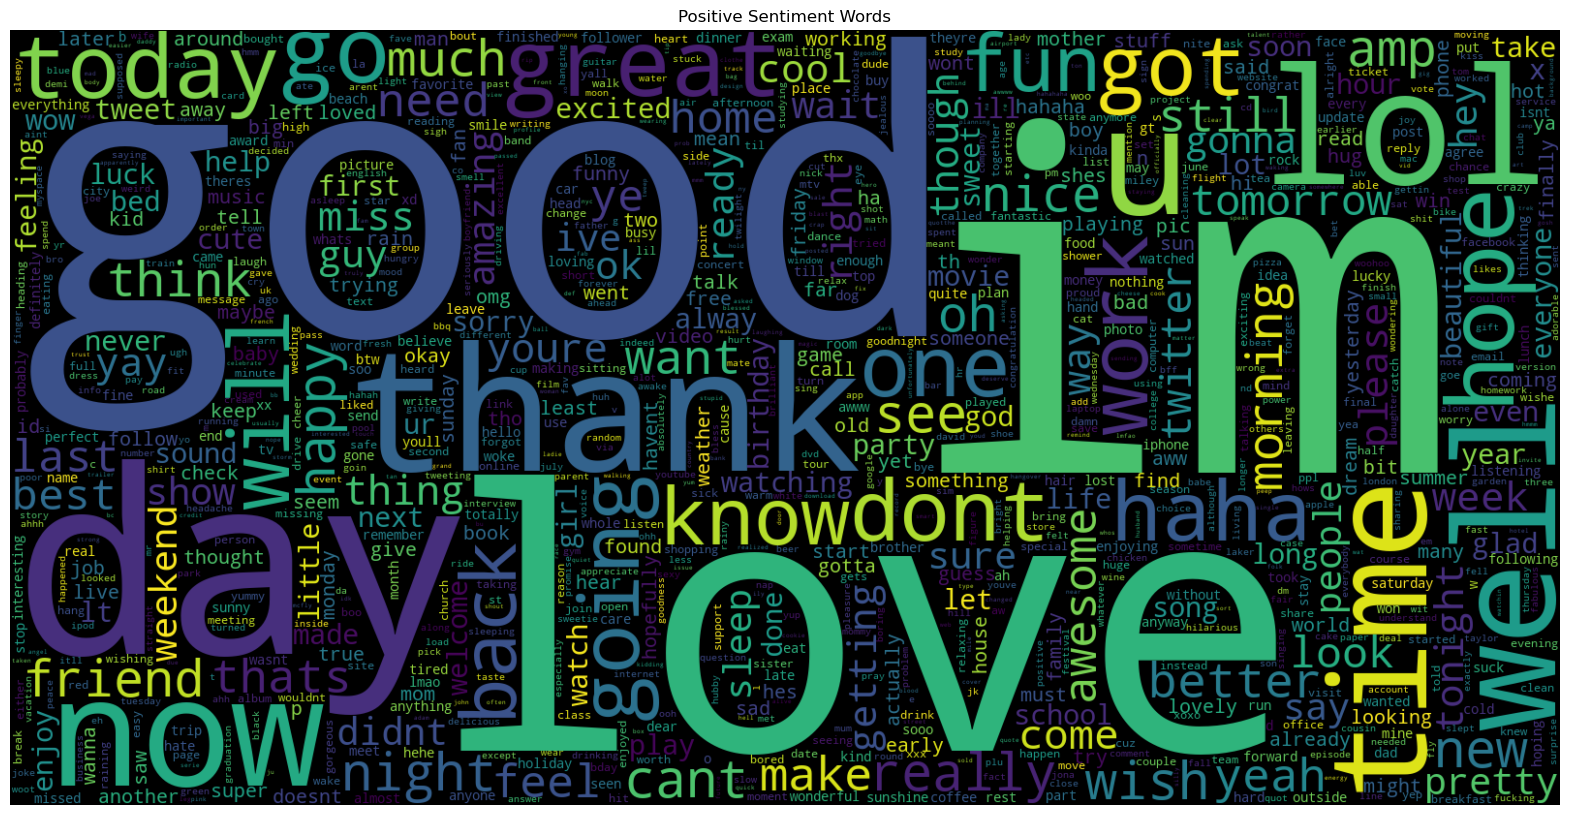

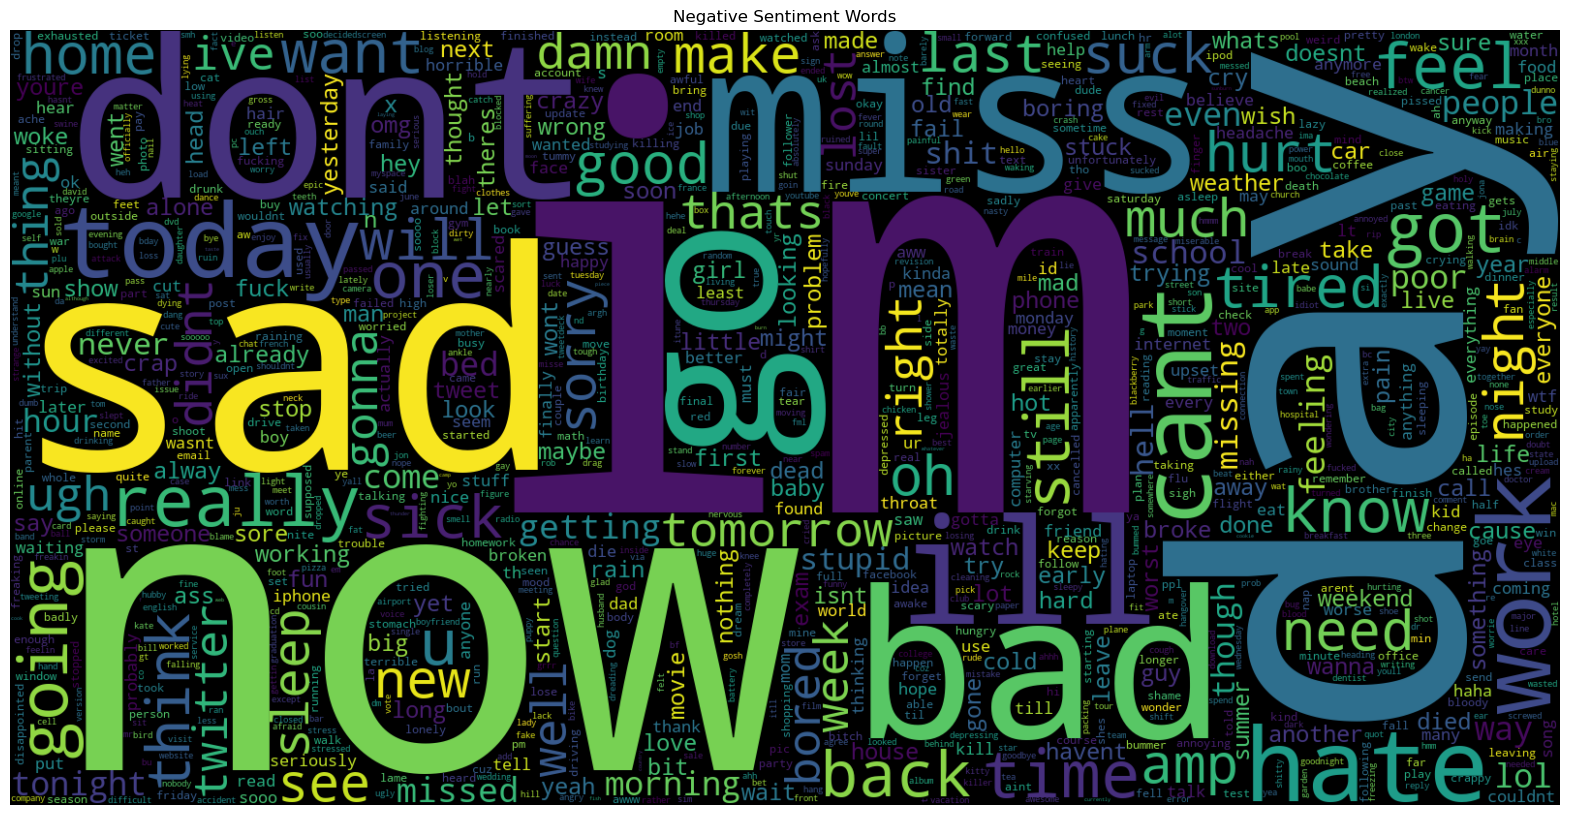

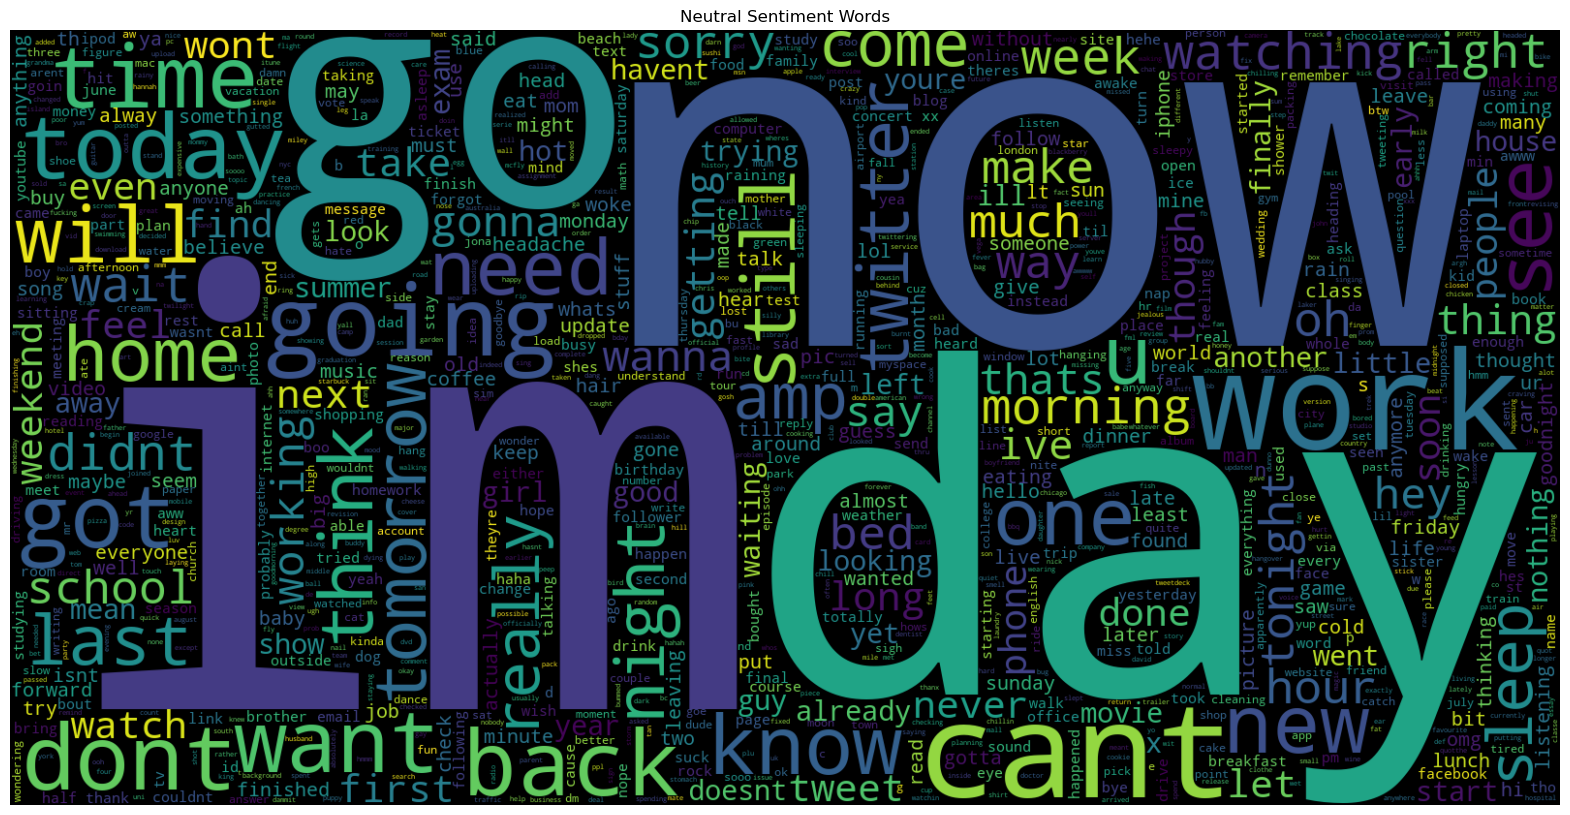

In [28]:
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to tokenize the words in the tweets
def tokenize_text(tweet):
    return word_tokenize(tweet)

# Tokenize the words in the tweets
df['tokenized_text'] = df['tweet'].apply(tokenize_text)

# Separating data by sentiment
data_positive = " ".join(df[df['compound'] > 0.1]['tweet'])
data_negative = " ".join(df[df['compound'] < -0.1]['tweet'])
data_neutral = " ".join(df[(df['compound'] >= -0.1) & (df['compound'] <= 0.1)]['tweet'])

# Function to create and display word clouds
def generate_wordcloud(data, title):
    wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(data)
    plt.figure(figsize=(20, 20))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generate word clouds for each sentiment
generate_wordcloud(data_positive, 'Positive Sentiment Words')
generate_wordcloud(data_negative, 'Negative Sentiment Words')
generate_wordcloud(data_neutral, 'Neutral Sentiment Words')

In [29]:
#Created the Word Corpus and Sentiment Labeling
from collections import defaultdict

# Created a dictionary where keys are sentiments and values are lists of words
corpus = defaultdict(list)

for index, row in df.iterrows():
    words = word_tokenize(row['tweet'])
    sentiment = 'neutral'  # Default sentiment
    if row['compound'] > 0.1:
        sentiment = 'positive'
    elif row['compound'] < -0.1:
        sentiment = 'negative'
    for word in words:
        corpus[sentiment].append(word)

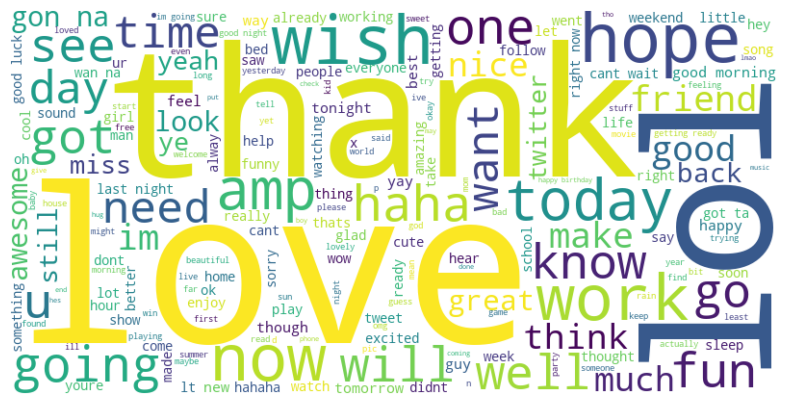

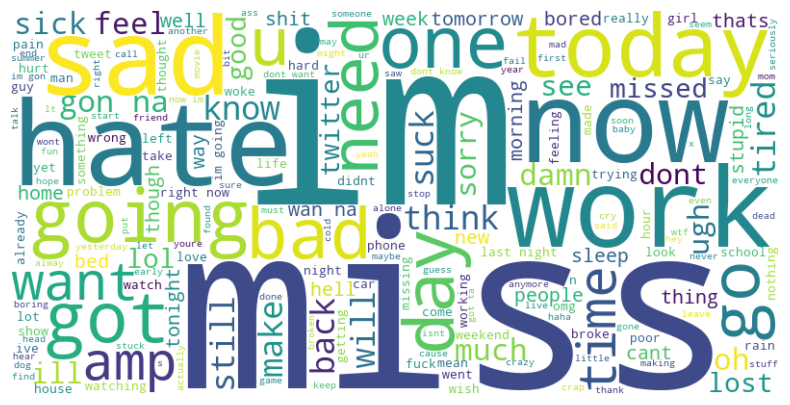

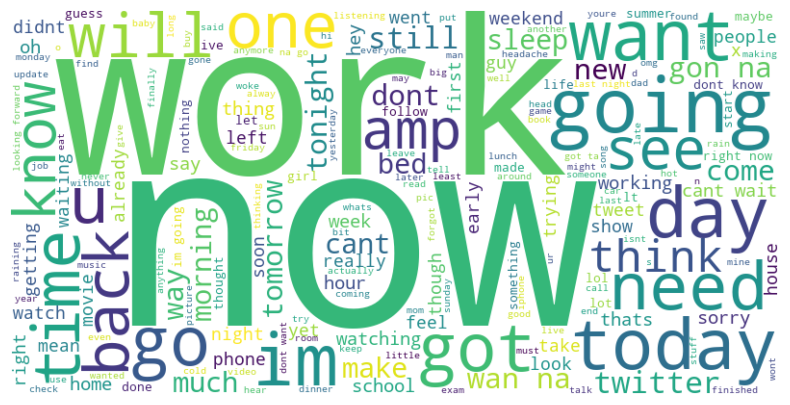

In [30]:
#Generate Word Clouds for Each Sentiment
from wordcloud import WordCloud

def generate_wordcloud_from_corpus(corpus, sentiment):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(corpus[sentiment]))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Generate word clouds
generate_wordcloud_from_corpus(corpus, 'positive')
generate_wordcloud_from_corpus(corpus, 'negative')
generate_wordcloud_from_corpus(corpus, 'neutral')

Dropdown(description='Sentiment:', options=('positive', 'negative', 'neutral'), value='positive')

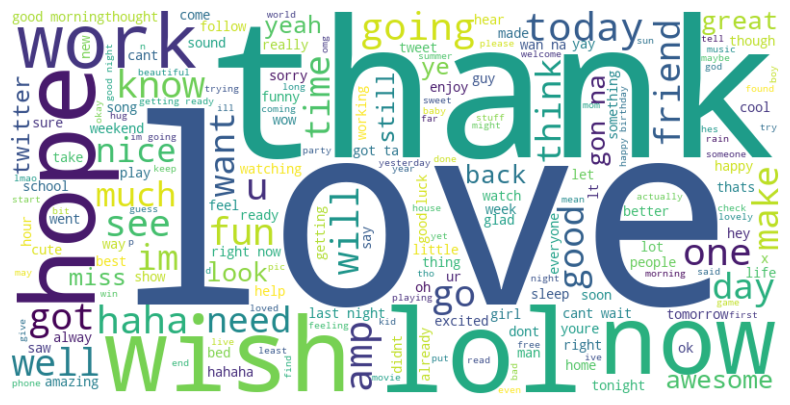

In [31]:
#Create a Dashboard to Switch Between Word Clouds
import ipywidgets as widgets
from IPython.display import display, clear_output

# Create a dropdown widget
sentiment_dropdown = widgets.Dropdown(
    options=['positive', 'negative', 'neutral'],
    value='positive',
    description='Sentiment:',
)

# Display word cloud based on dropdown selection
def display_wordcloud(change):
    clear_output(wait=True)
    display(sentiment_dropdown)
    generate_wordcloud_from_corpus(corpus, change['new'])

# Set up observer to handle changes in dropdown
sentiment_dropdown.observe(display_wordcloud, names='value')

# Display the dropdown
display(sentiment_dropdown)

In [32]:
from nltk.tokenize import word_tokenize

# Tokenize each tweet and store in a new column
df['tokens'] = df['tweet'].progress_apply(word_tokenize)

# Flatten the list of tokens to create the corpus
flat_corpus = [word for tokens in df['tokens'] for word in tokens]

  0%|          | 0/1584469 [00:00<?, ?it/s]

C:\Users\swast\AppData\Local\Temp\ipykernel_4852\3889127961.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df['tweet'].progress_apply(word_tokenize)


In [33]:
def generate_concordance(corpus, target_word):
    text = Text(corpus)
    concordance_list = text.concordance_list(target_word, width=80, lines=25)
    # Extract surrounding words for the word cloud
    surrounding_words = [word for conc in concordance_list for word in conc.line.split() if word != target_word]
    return concordance_list, surrounding_words

def display_concordance(concordance_list):
    for concordance in concordance_list:
        print(concordance.line)
        
def generate_wordcloud_from_list(word_list):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(word_list))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [34]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Textbox widget for user input
target_word_textbox = widgets.Text(
    value='',
    description='Target Word:',
    disabled=False
)

out = widgets.Output()

# Handler function to update concordance and word cloud based on input
def on_target_word_submit(change):
    with out:
        clear_output(wait=True)
        target_word = target_word_textbox.value  # Accessing the value of the textbox directly
        if target_word:
            concordance_list, surrounding_words = generate_concordance(flat_corpus, target_word)
            display_concordance(concordance_list)
            print("\nWord Cloud for surrounding words:\n")
            generate_wordcloud_from_list(surrounding_words)

# Setup to handle the user inputs a target word
target_word_textbox.on_submit(on_target_word_submit)

# Display the textbox and output widgets
display(target_word_textbox, out)

Text(value='', description='Target Word:')

Output()